# Load library

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [4]:
url = 'https://raw.githubusercontent.com/Jessadakorn-pun/Dataset/main/HousingData.csv'
df = pd.read_csv(url)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# Explore Dataset

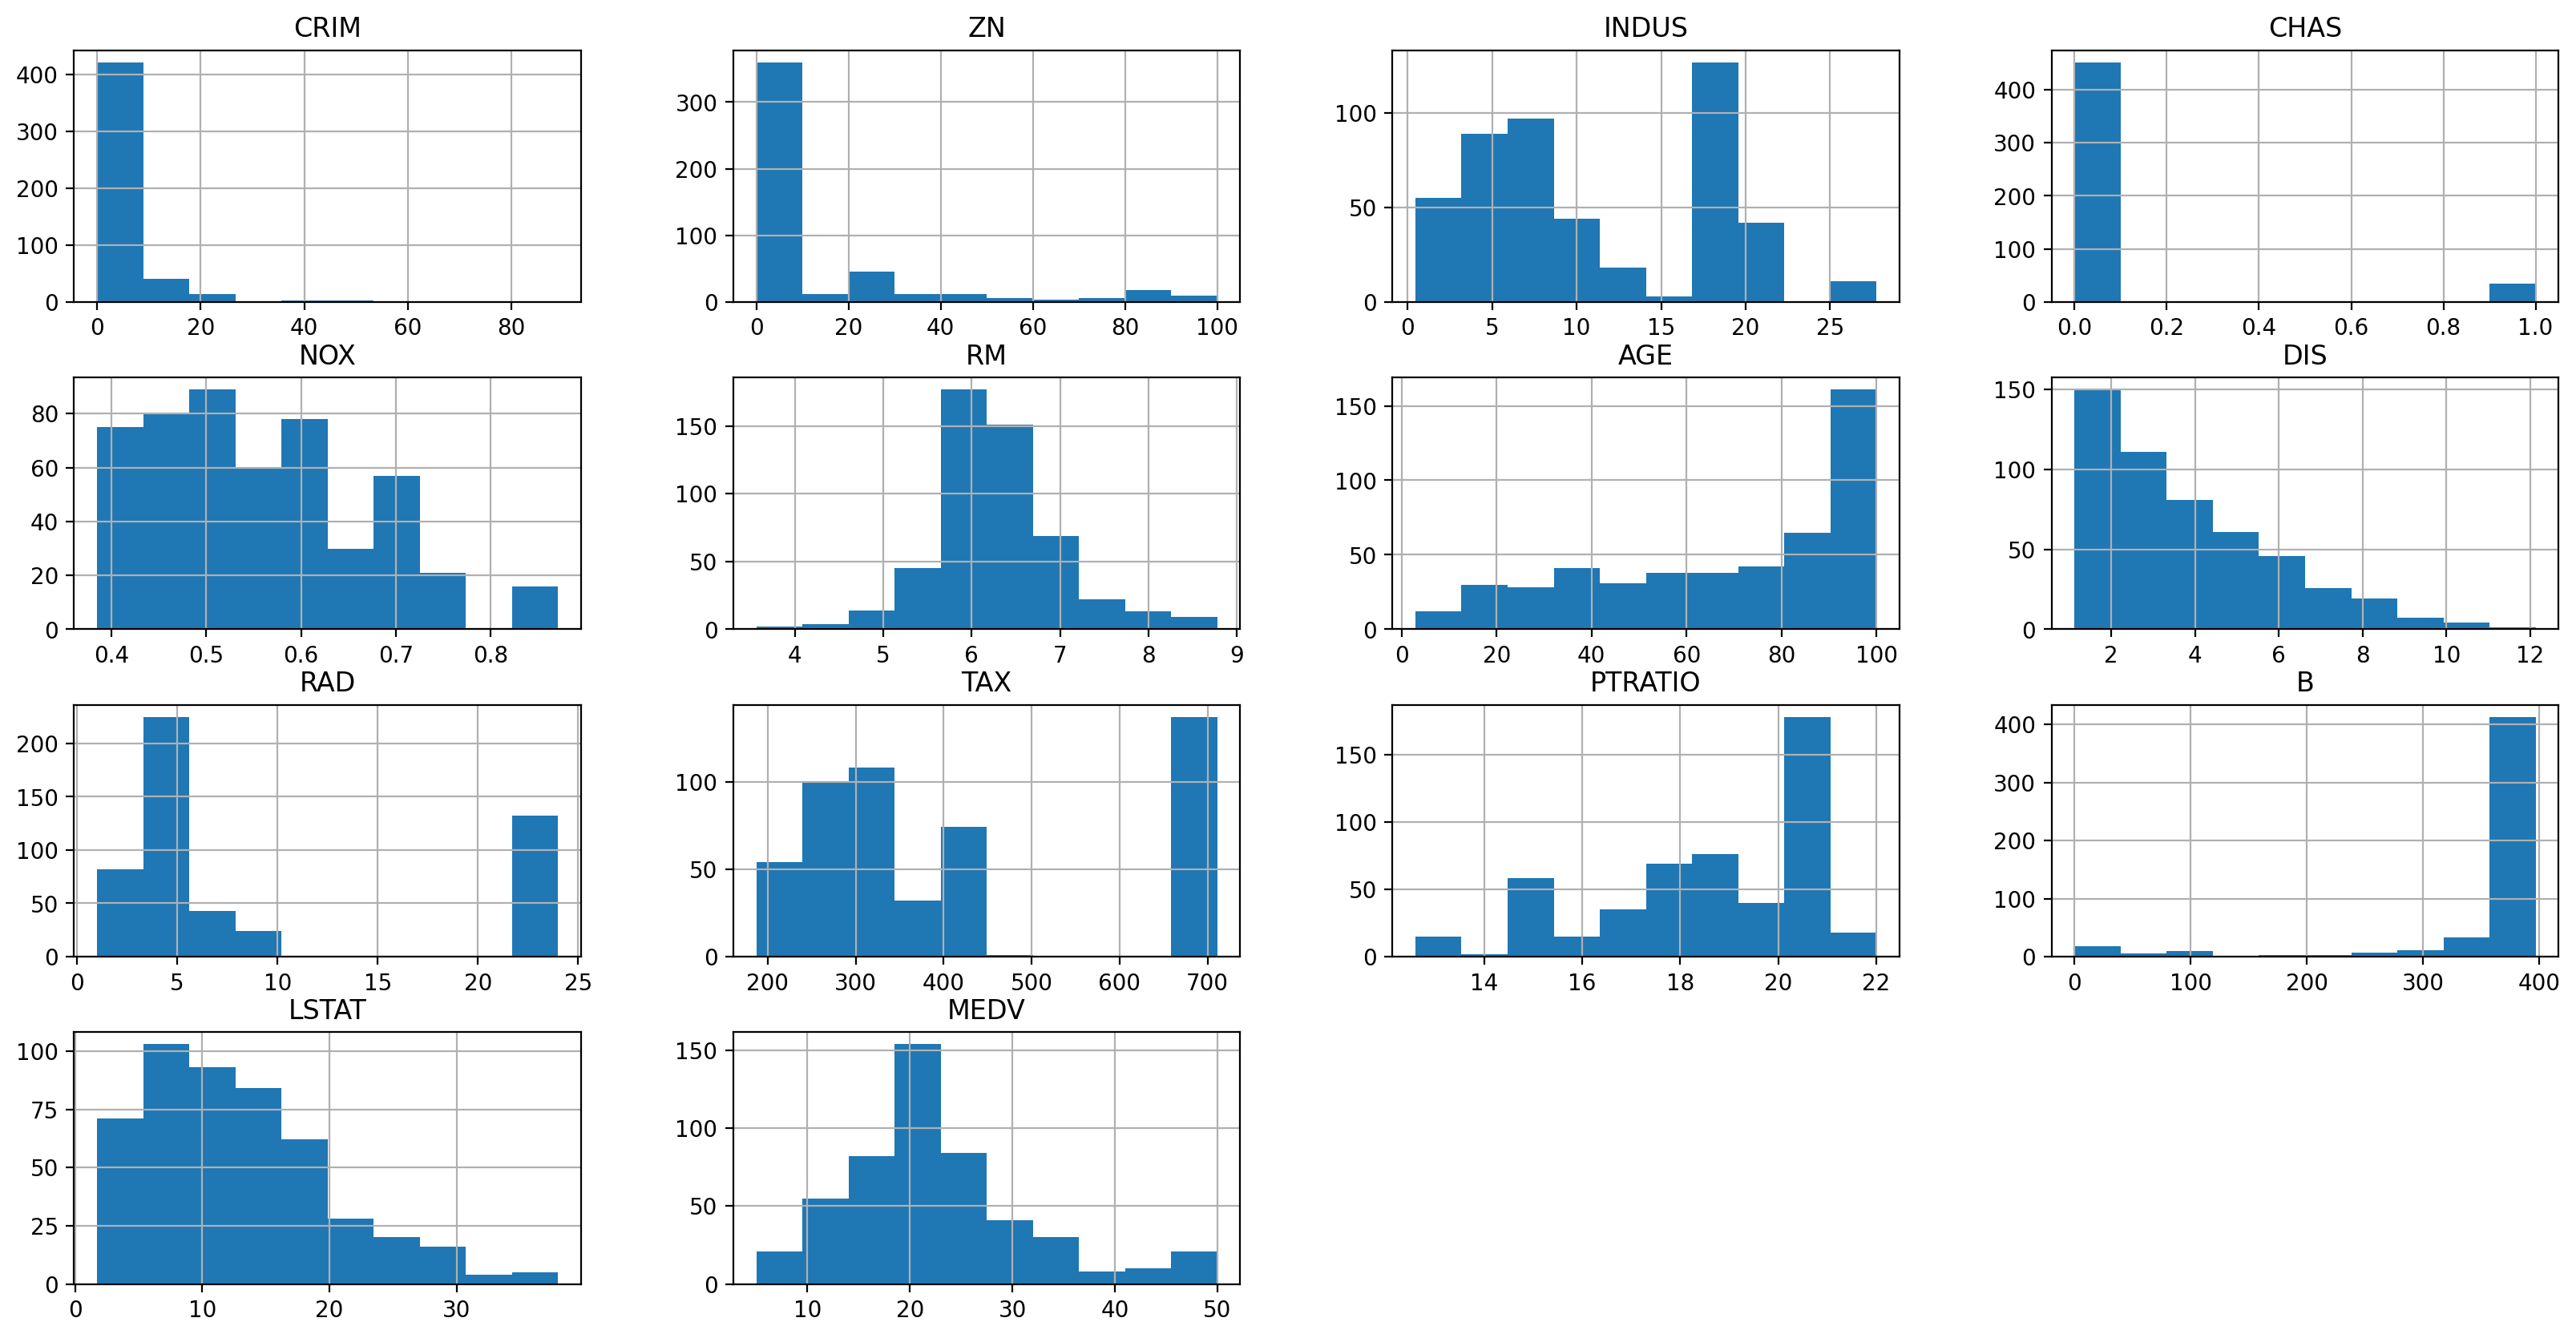

In [9]:
## histogram
df.hist(figsize=(20, 10));

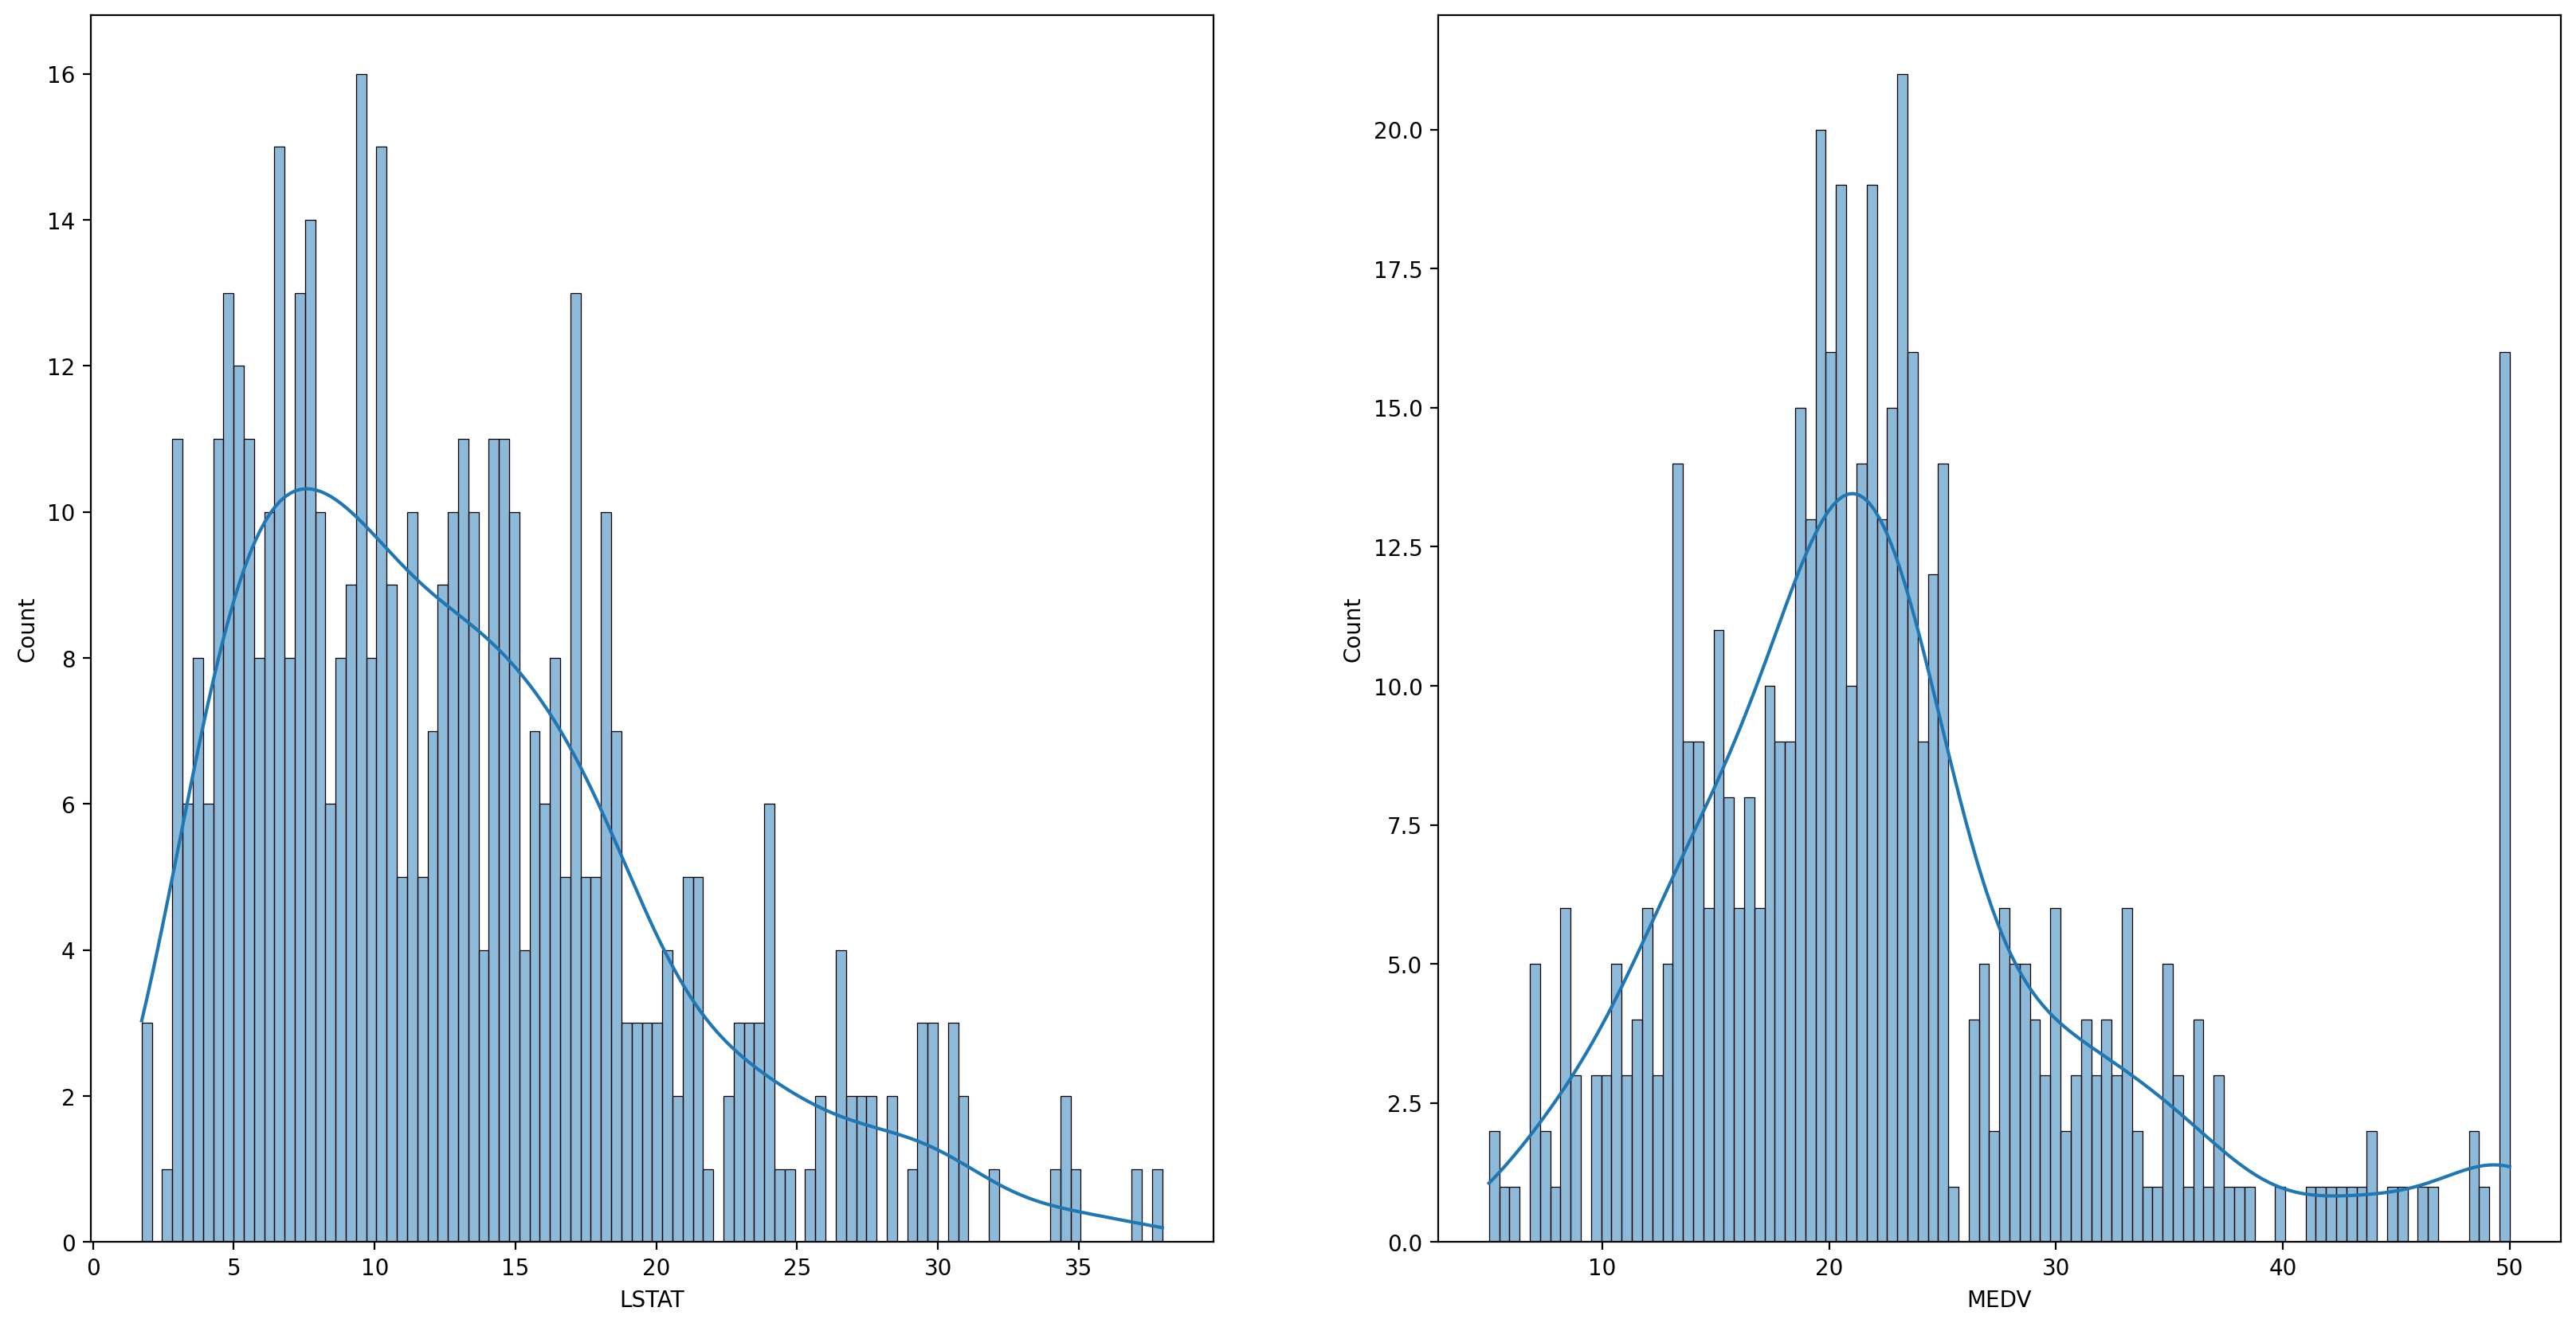

In [16]:
## histogram
cols = ['LSTAT', 'MEDV']
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
for i, e in enumerate(cols):
    sns.histplot(data = df, x = e, ax = ax[i], kde = True, bins = 100)

/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


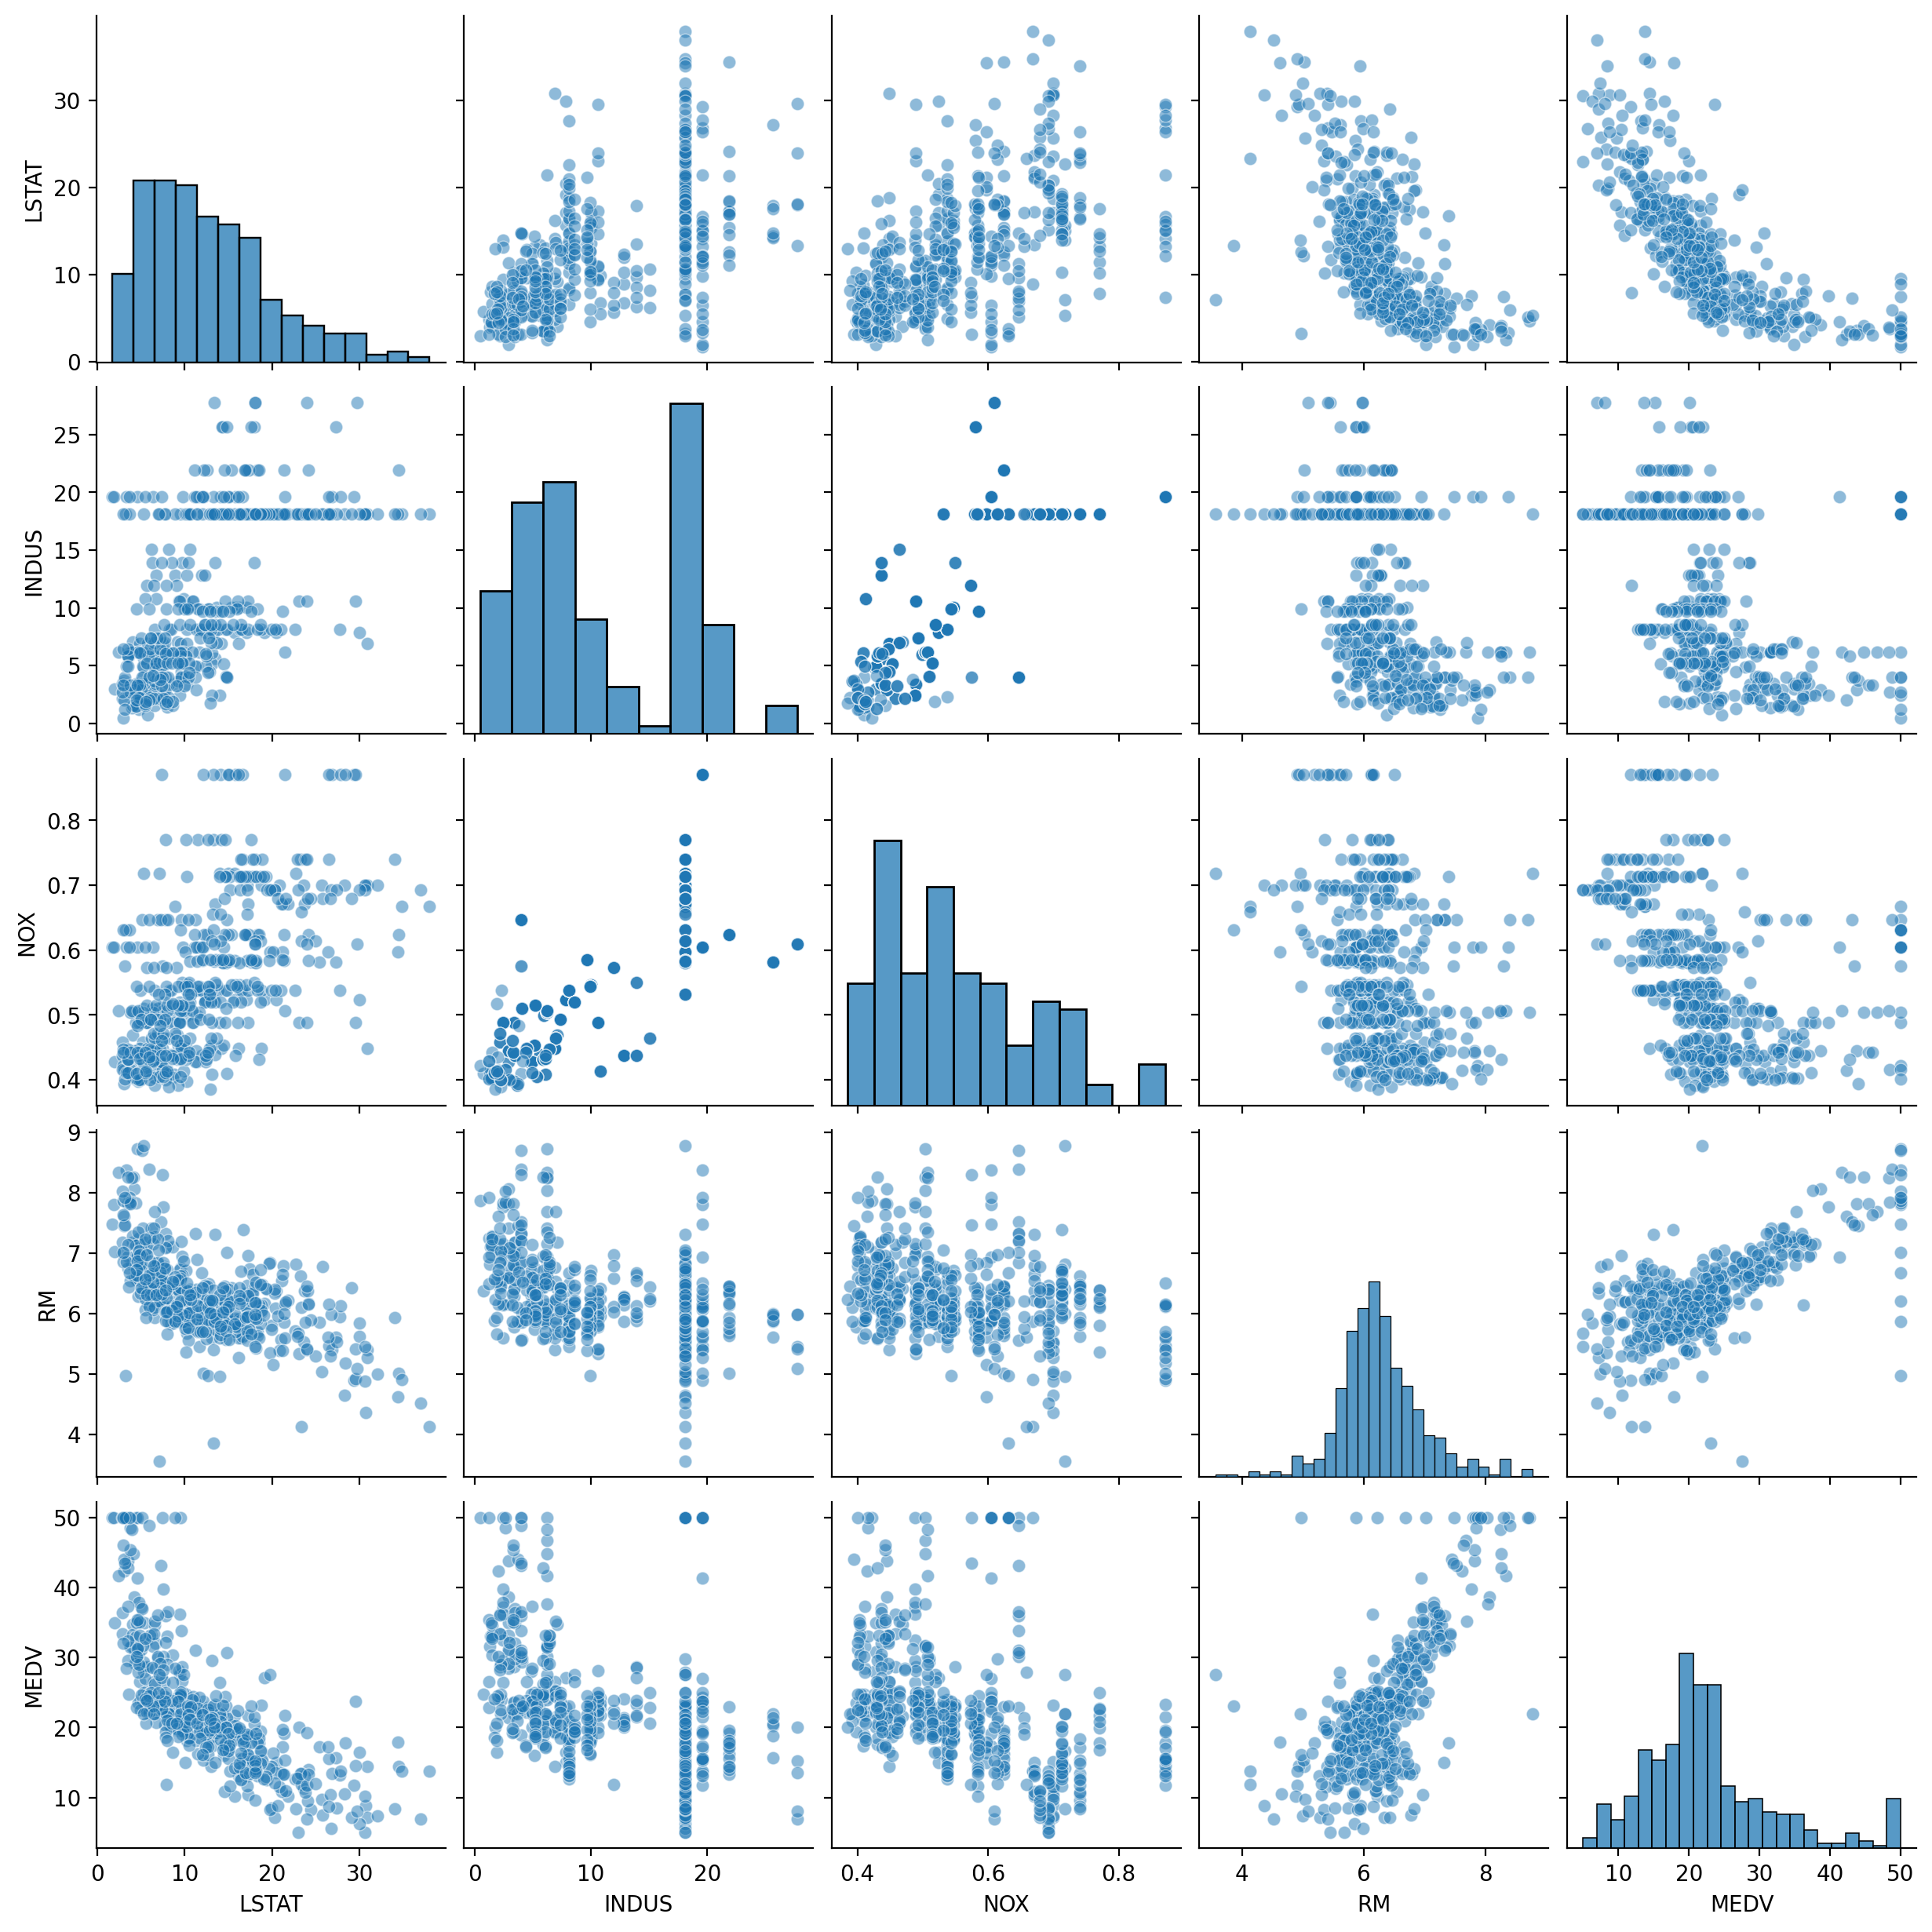

In [20]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], plot_kws={'alpha' : .5});

In [25]:
## correation matrix
cor_mat = df.corr()
cor_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


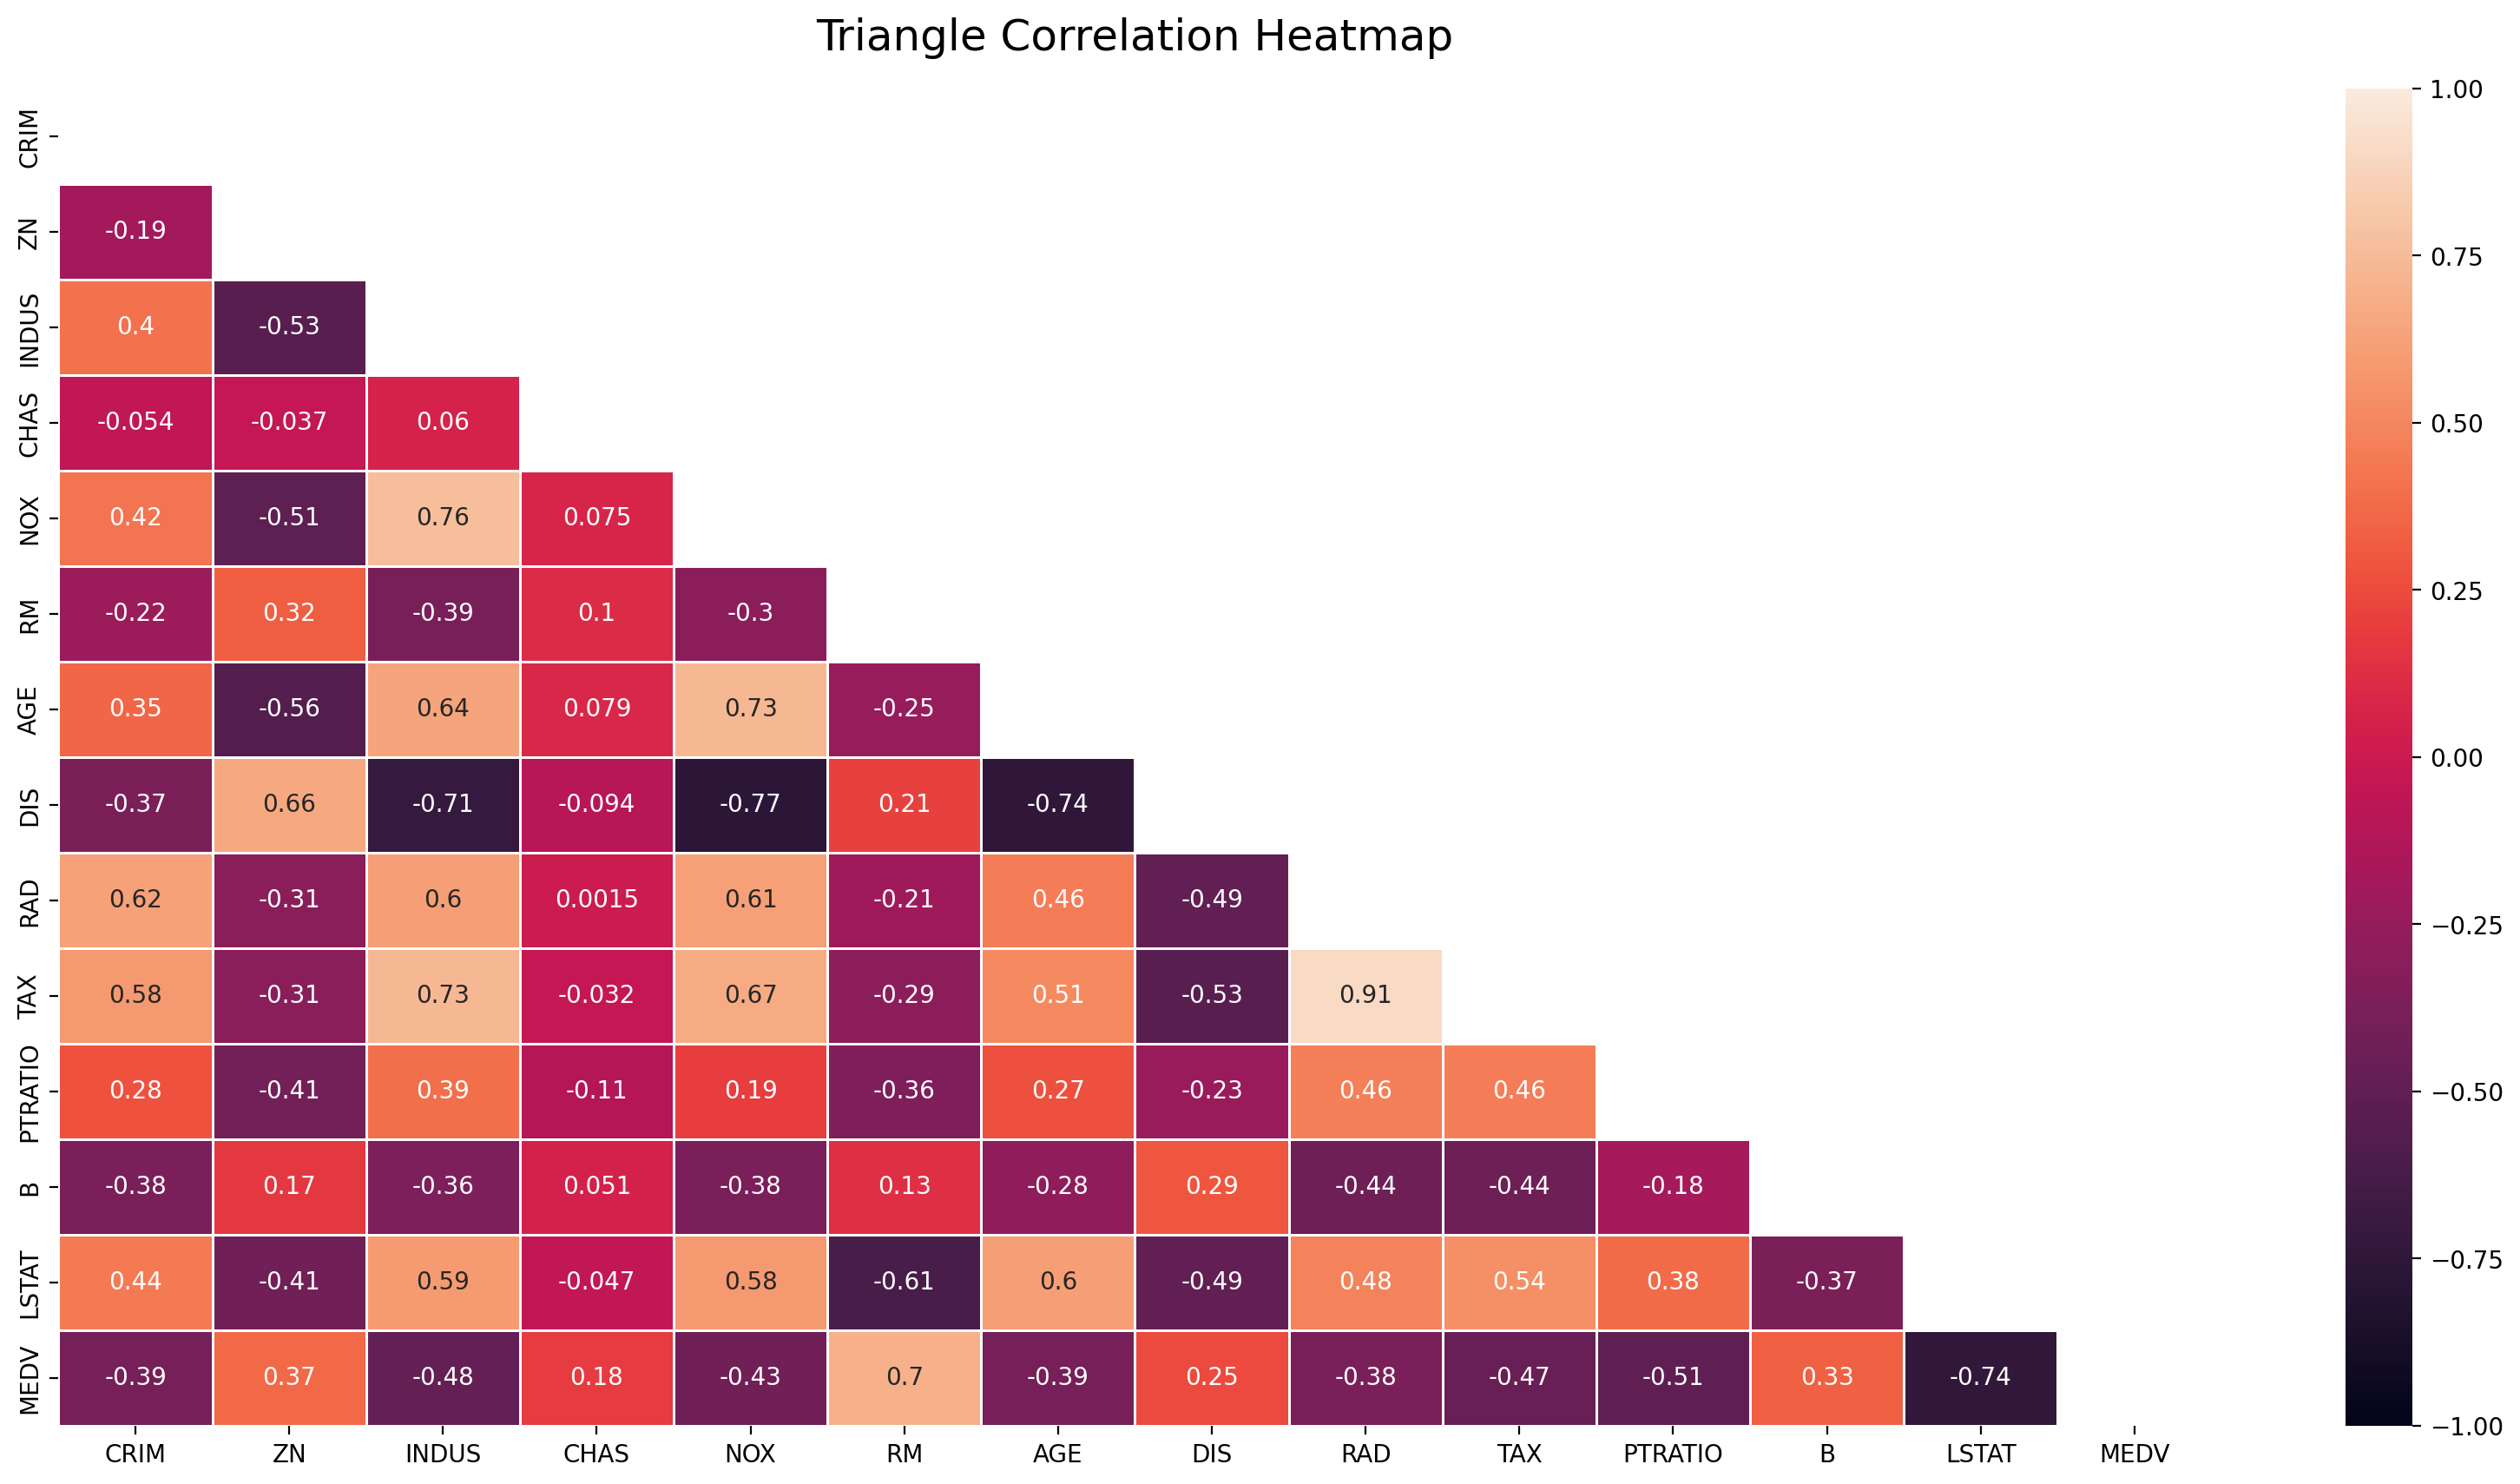

In [37]:
mask = np.triu(np.ones_like(cor_mat))
fig = plt.figure(figsize=(20, 10))
fig = sns.heatmap(df.corr(), mask=mask, vmax=1, vmin=-1, annot=True, linewidths=.5)
fig.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [54]:
## Selecting features
X = df[['LSTAT']]
y = df['MEDV']
print(X.shape)
print(y.shape)

(506, 1)
(506,)


In [49]:
df[['LSTAT', "MEDV"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSTAT   486 non-null    float64
 1   MEDV    506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [55]:
## fill na with median
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
X['LSTAT'] = imp.fit_transform(X)

/tmp/ipykernel_54763/2444683920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LSTAT'] = imp.fit_transform(X)


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSTAT   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


# Split Data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=0)
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (354, 1)
X_test.shape = (152, 1)


# Train Data

In [59]:
model = LinearRegression()
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [60]:
model.fit(X_train, y_train)

LinearRegression()

In [62]:
## R-square
model.score(X_train, y_train)

0.5299720464895937

In [63]:
## slope
model.coef_

array([-0.967242])

In [64]:
## intercept
model.intercept_

34.81570407914333

In [69]:
## predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [73]:
## test RMSE
test_rmse = metrics.mean_squared_error(y_test, y_test_pred, squared=False)
train_rmse = metrics.mean_squared_error(y_train, y_train_pred, squared=False)

print(f'train_rmse = {train_rmse}')
print(f'test_rmse = {test_rmse}')

train_rmse = 6.312027471152586
test_rmse = 6.431610647262221


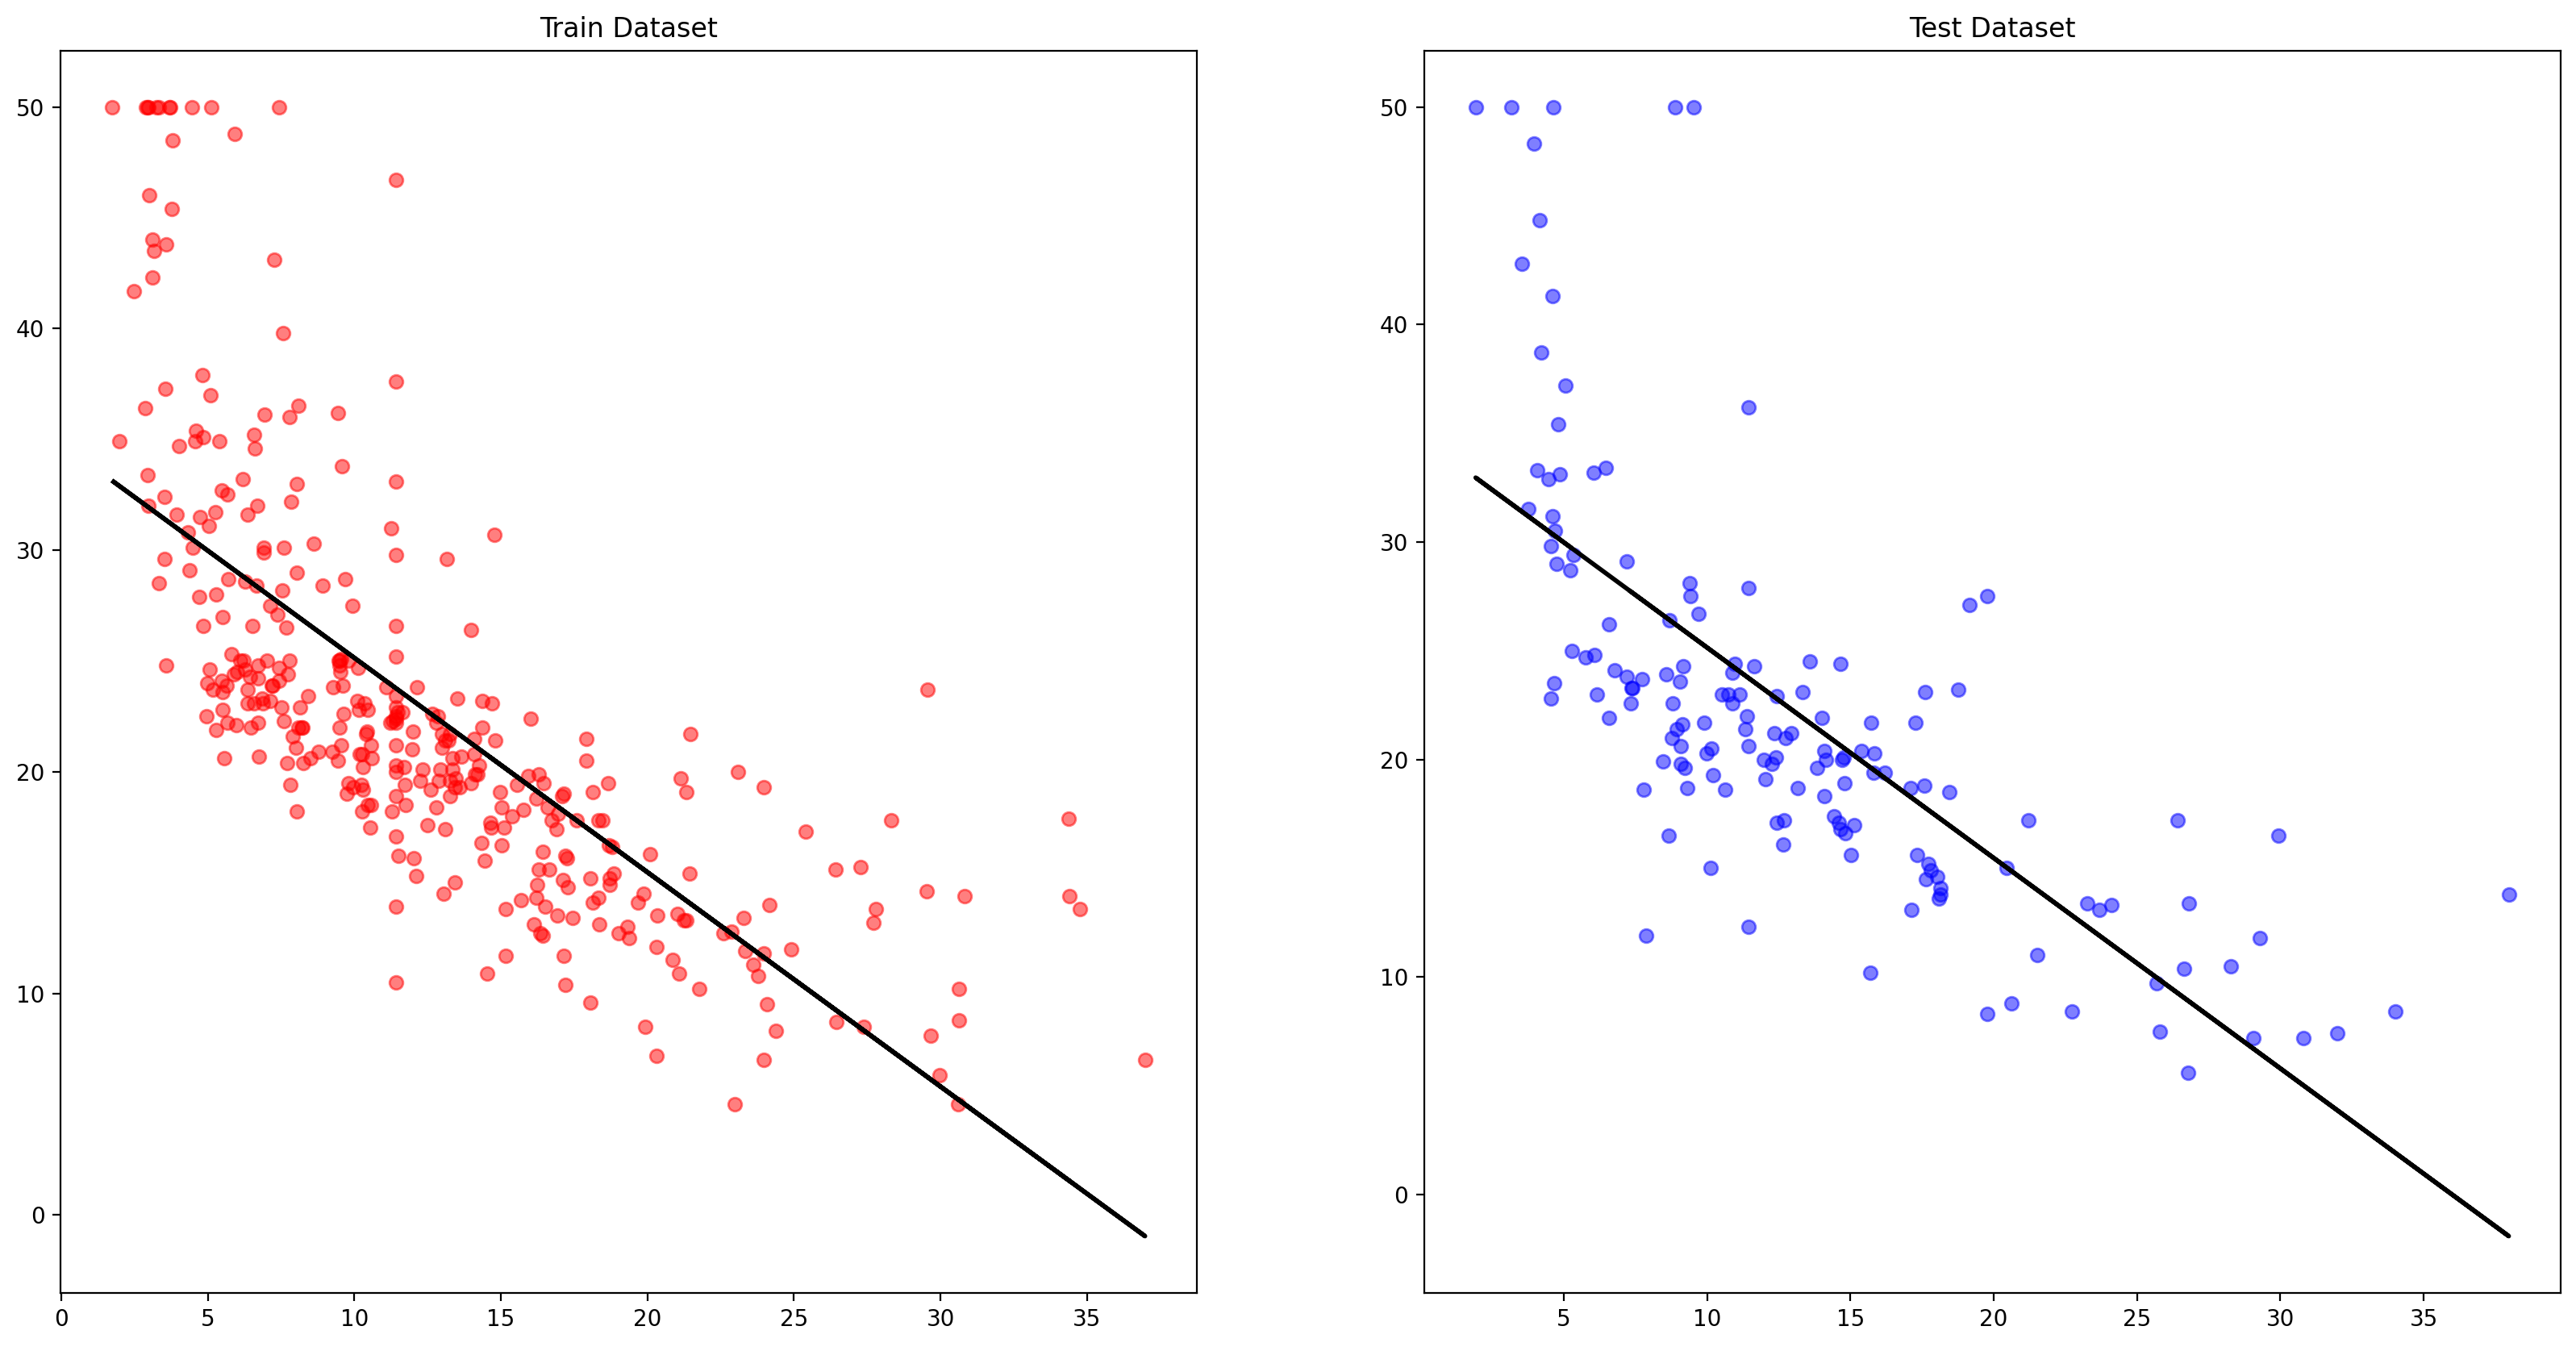

In [95]:
## reg plot

plot = [(X_train, y_train, y_train_pred, 'red', 'Train Dataset'), (X_test, y_test, y_test_pred, 'blue', 'Test Dataset')]
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i, e in enumerate(plot):
    ax[i].plot(e[0], e[2], color = 'black', lw = 2)
    ax[i].scatter(e[0], e[1], c = e[3], alpha = .5)
    ax[i].set_title(e[4])

In [99]:
## predict all data point
y_pred = model.predict(X)

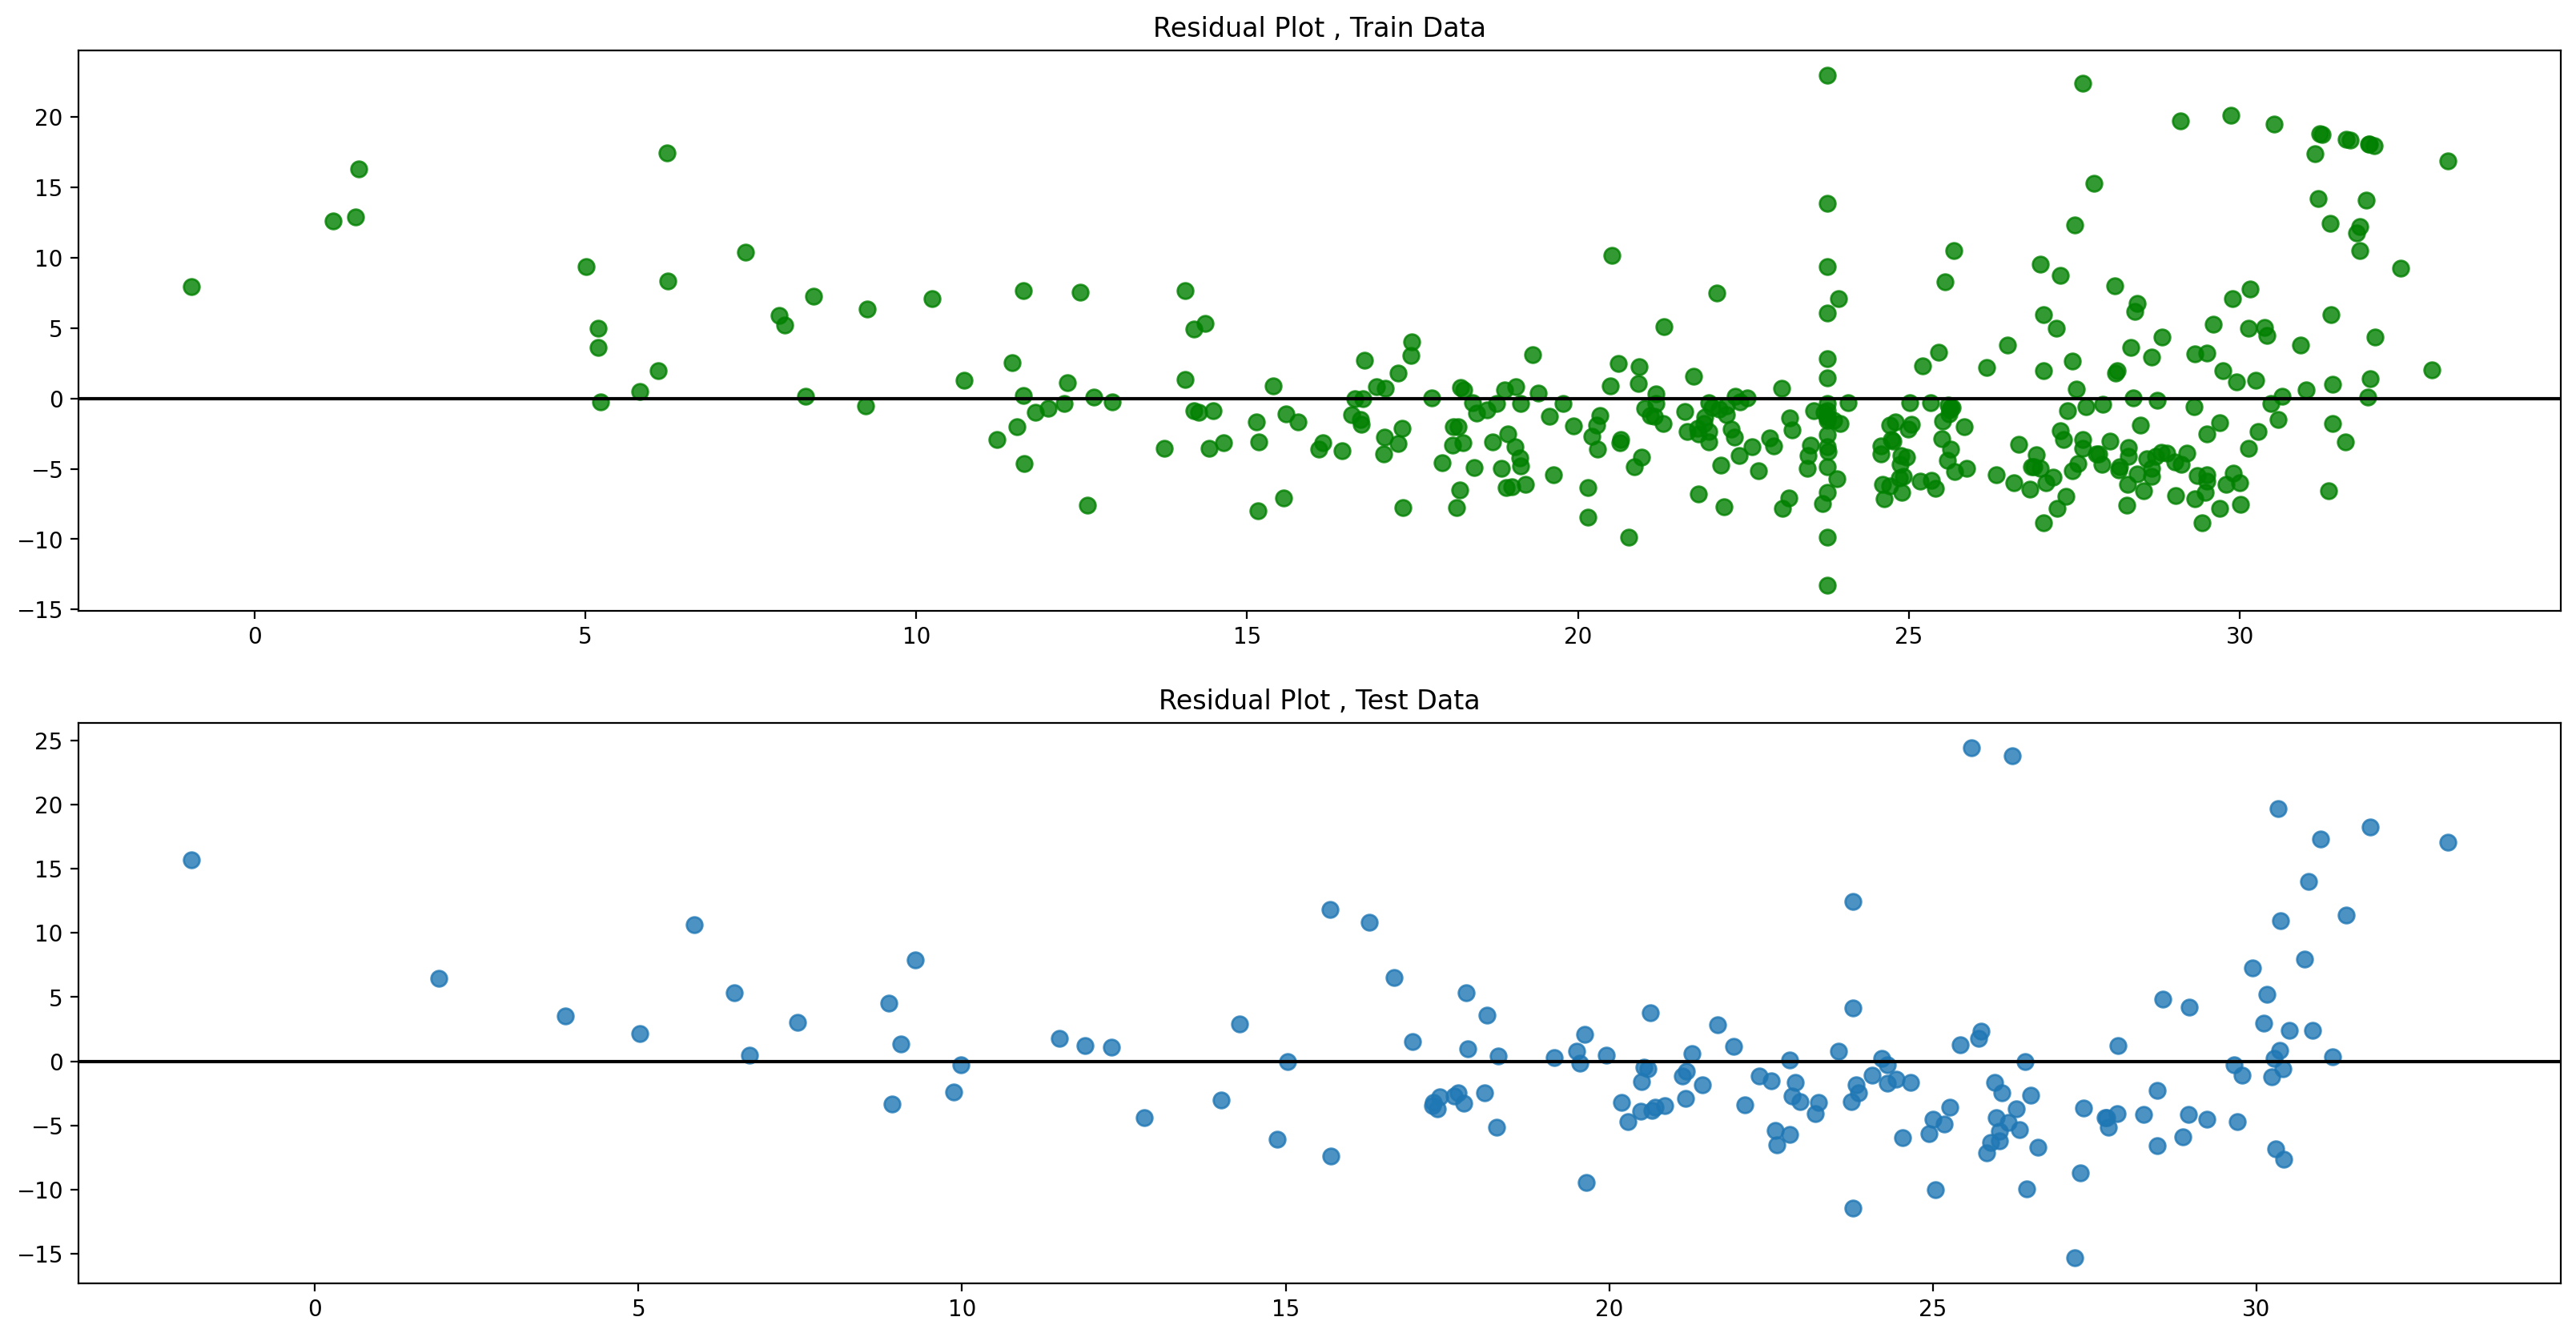

In [121]:
## residual plot
fig, ax = plt.subplots(2, 1, figsize = (20, 10))

ax[0].scatter(y_train_pred, y_train - y_train_pred, s = 50, alpha = .8, c = 'green')
ax[0].axhline(0, color = 'black')
ax[0].set_title('Residual Plot , Train Data');

ax[1].scatter(y_test_pred, y_test - y_test_pred, s = 50, alpha = .8)
ax[1].axhline(0, color = 'black')
ax[1].set_title('Residual Plot , Test Data');

In [124]:
## MSE
print(f"Train MSE = {metrics.mean_squared_error(y_train, y_train_pred)}")
print(f"Test MSE = {metrics.mean_squared_error(y_test, y_test_pred)}")

Train MSE = 39.84169079658491
Test MSE = 41.36561551797676


In [128]:
## R square
print(f'Train R-square = {metrics.r2_score(y_train, y_train_pred)}')
print(f'Test R-square = {metrics.r2_score(y_test, y_test_pred)}')

Train R-square = 0.5299720464895937
Test R-square = 0.503208235092745


In [138]:
def score(model_name, y_train, y_train_pred, y_test, y_test_pred):
    score =  pd.DataFrame(
        {
            "Modle" : [model_name],
            "Train MSE": [metrics.mean_squared_error(y_train, y_train_pred)],
            "Test MSE": [metrics.mean_squared_error(y_test, y_test_pred)],
            "Train R-square": [metrics.r2_score(y_train, y_train_pred)],
            "Test R-square": [metrics.r2_score(y_test, y_test_pred)]
        }
    )
    return score

In [139]:
re = score('Linear Regression', y_train, y_train_pred, y_test, y_test_pred)
re

,Modle,Train MSE,Test MSE,Train R-square,Test R-square
0,Linear Regression,39.841691,41.365616,0.529972,0.503208
